# UniNa - Machine Learning 22/23 - MiniContest n2
---

## Data preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

### raw data

In [2]:
df_raw = pd.read_excel("Training_raw.xlsx")

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
df_raw. head()

,second,val_0,val_1,val_2,val_3,val_4,val_5
0,0,41,49,95,120,47,46
1,0,41,49,95,120,47,46
2,0,41,49,95,121,48,47
3,0,41,49,95,121,47,47
4,0,41,49,95,121,47,47


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567296 entries, 0 to 567295
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   second  567296 non-null  int64
 1   val_0   567296 non-null  int64
 2   val_1   567296 non-null  int64
 3   val_2   567296 non-null  int64
 4   val_3   567296 non-null  int64
 5   val_4   567296 non-null  int64
 6   val_5   567296 non-null  int64
dtypes: int64(7)
memory usage: 30.3 MB


In [5]:
df_raw.head()

,second,val_0,val_1,val_2,val_3,val_4,val_5
0,0,41,49,95,120,47,46
1,0,41,49,95,120,47,46
2,0,41,49,95,121,48,47
3,0,41,49,95,121,47,47
4,0,41,49,95,121,47,47


In [6]:
df_raw['second'].value_counts()

634    935
63     878
42     875
327    805
71     748
      ... 
206    136
817    114
266     53
511     45
0       29
Name: second, Length: 1002, dtype: int64

### preprocessed data

In [7]:
df_prep = pd.read_excel("Training_preprocessed.xlsx")

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [8]:
df_prep.head()

,second,val_0_min,val_1_min,val_2_min,val_3_min,val_4_min,val_5_min,val_0_max,val_1_max,val_2_max,...,val_3_std,val_4_std,val_5_std,val_0_var,val_1_var,val_2_var,val_3_var,val_4_var,val_5_var,class
0,0,41,49,95,120,47,46,41,50,96,...,0.470824,0.384426,0.435494,0.000000,0.147783,0.123153,0.221675,0.147783,0.189655,0.00
1,1,18,19,18,10,14,17,46,76,103,...,38.948626,7.553299,3.295951,5.233212,34.764129,697.845107,1516.995484,57.052327,10.863294,0.10
2,2,23,32,15,11,16,31,48,65,98,...,40.252709,4.550546,1.860322,3.213855,18.106360,691.942503,1620.280581,20.707469,3.460800,0.29
3,3,26,25,19,15,16,32,48,70,102,...,39.295043,5.509494,2.184437,2.449684,27.190514,650.722495,1544.100420,30.354529,4.771767,0.48
4,4,23,30,20,12,19,33,46,69,108,...,40.876464,5.202366,1.715481,2.499633,23.186358,732.476140,1670.885299,27.064610,2.942875,0.68


In [9]:
df_prep.isnull().sum()

second        0
val_0_min     0
val_1_min     0
val_2_min     0
val_3_min     0
val_4_min     0
val_5_min     0
val_0_max     0
val_1_max     0
val_2_max     0
val_3_max     0
val_4_max     0
val_5_max     0
val_0_mean    0
val_1_mean    0
val_2_mean    0
val_3_mean    0
val_4_mean    0
val_5_mean    0
val_0_med     0
val_1_med     0
val_2_med     0
val_3_med     0
val_4_med     0
val_5_med     0
val_0_sum     0
val_1_sum     0
val_2_sum     0
val_3_sum     0
val_4_sum     0
val_5_sum     0
val_0_std     0
val_1_std     0
val_2_std     0
val_3_std     0
val_4_std     0
val_5_std     0
val_0_var     0
val_1_var     0
val_2_var     0
val_3_var     0
val_4_var     0
val_5_var     0
class         0
dtype: int64

In [10]:
df_prep.columns

Index(['second', 'val_0_min', 'val_1_min', 'val_2_min', 'val_3_min',
       'val_4_min', 'val_5_min', 'val_0_max', 'val_1_max', 'val_2_max',
       'val_3_max', 'val_4_max', 'val_5_max', 'val_0_mean', 'val_1_mean',
       'val_2_mean', 'val_3_mean', 'val_4_mean', 'val_5_mean', 'val_0_med',
       'val_1_med', 'val_2_med', 'val_3_med', 'val_4_med', 'val_5_med',
       'val_0_sum', 'val_1_sum', 'val_2_sum', 'val_3_sum', 'val_4_sum',
       'val_5_sum', 'val_0_std', 'val_1_std', 'val_2_std', 'val_3_std',
       'val_4_std', 'val_5_std', 'val_0_var', 'val_1_var', 'val_2_var',
       'val_3_var', 'val_4_var', 'val_5_var', 'class'],
      dtype='object')

In [11]:
classes = pd.value_counts(df_prep["class"], sort=True).sort_index()
classes

0.00     1
0.03     1
0.04     1
0.09     1
0.10     1
        ..
3.87    80
3.88    79
3.89    12
3.90     1
3.95     1
Name: class, Length: 98, dtype: int64

<AxesSubplot: >

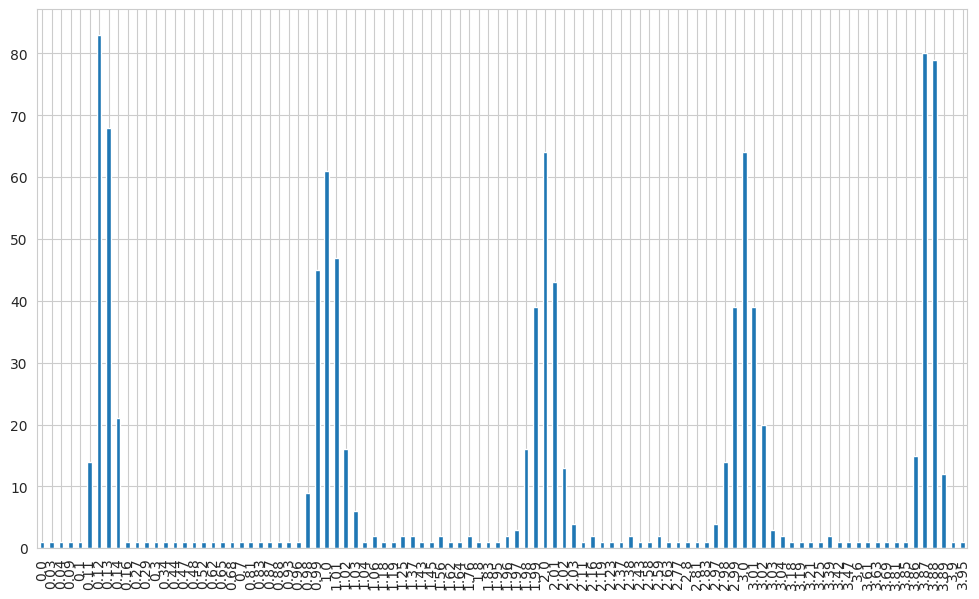

In [12]:
classes.plot(kind="bar", figsize=(12,7))

#### min

In [13]:
df_prep_min = df_prep[["val_0_min", "val_1_min", "val_2_min", "val_3_min", "val_4_min", "val_5_min"]]
df_prep_min.head()

,val_0_min,val_1_min,val_2_min,val_3_min,val_4_min,val_5_min
0,41,49,95,120,47,46
1,18,19,18,10,14,17
2,23,32,15,11,16,31
3,26,25,19,15,16,32
4,23,30,20,12,19,33


<AxesSubplot: >

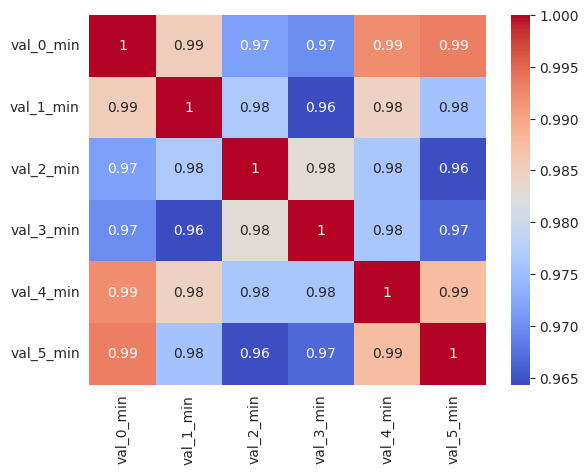

In [14]:
sns.heatmap(df_prep_min.corr(), annot=True, cmap='coolwarm')

#### max

In [15]:
df_prep_max = df_prep[["val_0_max", "val_1_max", "val_2_max", "val_3_max", "val_4_max", "val_5_max"]]
df_prep_max.head()

,val_0_max,val_1_max,val_2_max,val_3_max,val_4_max,val_5_max
0,41,50,96,121,48,47
1,46,76,103,124,56,50
2,48,65,98,125,71,49
3,48,70,102,127,65,49
4,46,69,108,127,60,50


<AxesSubplot: >

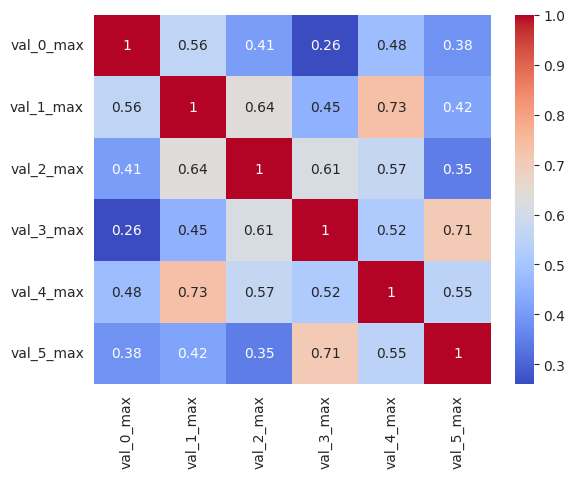

In [16]:
sns.heatmap(df_prep_max.corr(), annot=True, cmap='coolwarm')

#### mean

In [17]:
df_prep_mean = df_prep[["val_0_mean", "val_1_mean", "val_2_mean", "val_3_mean", "val_4_mean", "val_5_mean"]]
df_prep_mean.head()

,val_0_mean,val_1_mean,val_2_mean,val_3_mean,val_4_mean,val_5_mean
0,41.000000,49.172414,95.137931,120.689655,47.172414,46.758621
1,40.833613,46.727731,75.568067,91.211765,43.847059,46.018487
2,41.030151,47.614740,74.149079,87.653266,45.671692,46.566164
3,41.125839,46.902685,74.330537,88.250000,44.941275,46.291946
4,41.237458,47.593645,68.593645,80.774247,44.896321,46.468227


<AxesSubplot: >

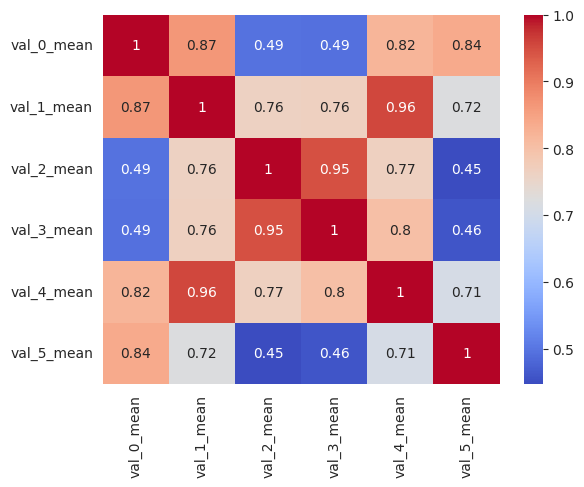

In [18]:
sns.heatmap(df_prep_mean.corr(), annot=True, cmap='coolwarm')

#### med

In [19]:
df_prep_med = df_prep[["val_0_med", "val_1_med", "val_2_med", "val_3_med", "val_4_med", "val_5_med"]]
df_prep_med.head()

,val_0_med,val_1_med,val_2_med,val_3_med,val_4_med,val_5_med
0,41.0,49.0,95.0,121.0,47.0,47.0
1,41.0,49.0,91.0,117.0,47.0,47.0
2,41.0,49.0,90.0,112.0,47.0,47.0
3,41.0,49.0,89.0,112.0,47.0,47.0
4,41.0,49.0,81.5,102.0,47.0,47.0


<AxesSubplot: >

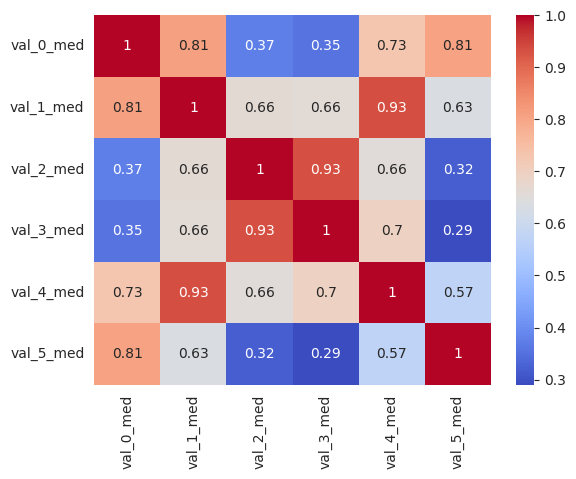

In [20]:
sns.heatmap(df_prep_med.corr(), annot=True, cmap='coolwarm')

#### sum

In [21]:
df_prep_sum = df_prep[["val_0_sum", "val_1_sum", "val_2_sum", "val_3_sum", "val_4_sum", "val_5_sum"]]
df_prep_sum.head()

,val_0_sum,val_1_sum,val_2_sum,val_3_sum,val_4_sum,val_5_sum
0,1189.0,1426.0,2759.0,3500.0,1368.0,1356.0
1,24296.0,27803.0,44963.0,54271.0,26089.0,27381.0
2,24495.0,28426.0,44267.0,52329.0,27266.0,27800.0
3,24511.0,27954.0,44301.0,52597.0,26785.0,27590.0
4,24660.0,28461.0,41019.0,48303.0,26848.0,27788.0


<AxesSubplot: >

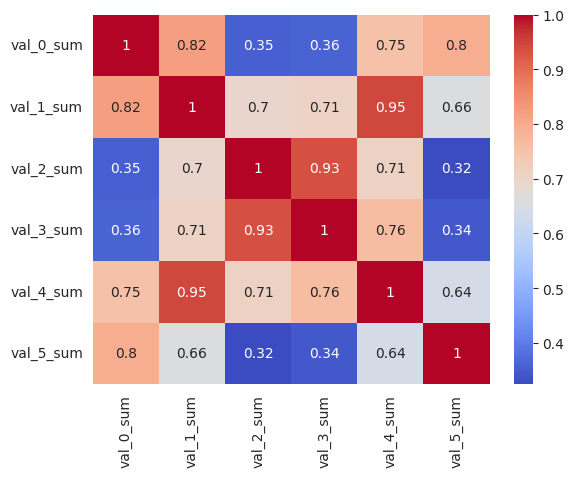

In [22]:
sns.heatmap(df_prep_sum.corr(), annot=True, cmap='coolwarm')

#### std

In [23]:
df_prep_std = df_prep[["val_0_std", "val_1_std", "val_2_std", "val_3_std", "val_4_std", "val_5_std"]]
df_prep_std.head()

,val_0_std,val_1_std,val_2_std,val_3_std,val_4_std,val_5_std
0,0.000000,0.384426,0.350931,0.470824,0.384426,0.435494
1,2.287621,5.896111,26.416758,38.948626,7.553299,3.295951
2,1.792723,4.255157,26.304800,40.252709,4.550546,1.860322
3,1.565147,5.214452,25.509263,39.295043,5.509494,2.184437
4,1.581023,4.815222,27.064296,40.876464,5.202366,1.715481


<AxesSubplot: >

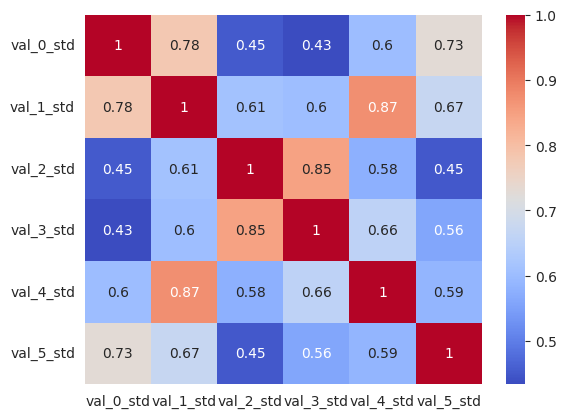

In [24]:
sns.heatmap(df_prep_std.corr(), annot=True, cmap='coolwarm')

#### var

In [25]:
df_prep_var = df_prep[["val_0_var", "val_1_var", "val_2_var", "val_3_var", "val_4_var", "val_5_var"]]
df_prep_var.head()

,val_0_var,val_1_var,val_2_var,val_3_var,val_4_var,val_5_var
0,0.000000,0.147783,0.123153,0.221675,0.147783,0.189655
1,5.233212,34.764129,697.845107,1516.995484,57.052327,10.863294
2,3.213855,18.106360,691.942503,1620.280581,20.707469,3.460800
3,2.449684,27.190514,650.722495,1544.100420,30.354529,4.771767
4,2.499633,23.186358,732.476140,1670.885299,27.064610,2.942875


<AxesSubplot: >

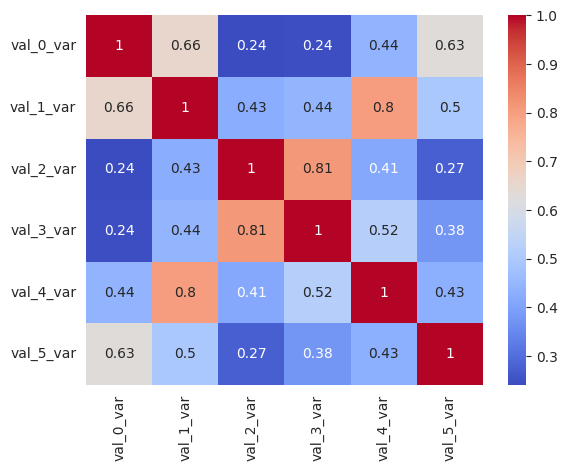

In [26]:
sns.heatmap(df_prep_var.corr(), annot=True, cmap='coolwarm')

The most uncorelated data is while using var preprocessed data.

## Preprocessing data

In [27]:
from sklearn.preprocessing import RobustScaler

#### min

In [28]:
scaler = RobustScaler()
min_scaler.fit(df_prep_min)
scaled_min_feat = min_scaler.fit_transform(df_prep_min)

In [29]:
X_min = pd.DataFrame(scaled_min_feat, columns=df_prep_min.columns)
X_min.head()

,val_0_min,val_1_min,val_2_min,val_3_min,val_4_min,val_5_min
0,5.333333,3.9,6.071429,14.000,4.111111,4.111111
1,1.500000,0.9,0.571429,0.250,0.444444,0.888889
2,2.333333,2.2,0.357143,0.375,0.666667,2.444444
3,2.833333,1.5,0.642857,0.875,0.666667,2.555556
4,2.333333,2.0,0.714286,0.500,1.000000,2.666667


#### max

In [30]:
max_scaler = RobustScaler()
max_scaler.fit(df_prep_max)
scaled_max_feat = max_scaler.fit_transform(df_prep_max)

In [31]:
X_max = pd.DataFrame(scaled_max_feat, columns=df_prep_max.columns)
X_max.head()

,val_0_max,val_1_max,val_2_max,val_3_max,val_4_max,val_5_max
0,-2.457831,-1.76,-0.375000,-2.88,-4.111111,-4.730435
1,-2.216867,-0.72,-0.083333,-2.76,-3.888889,-4.626087
2,-2.120482,-1.16,-0.291667,-2.72,-3.472222,-4.660870
3,-2.120482,-0.96,-0.125000,-2.64,-3.638889,-4.660870
4,-2.216867,-1.00,0.125000,-2.64,-3.777778,-4.626087


#### mean

In [32]:
mean_scaler = RobustScaler()
mean_scaler.fit(df_prep_mean)
scaled_mean_feat = mean_scaler.fit_transform(df_prep_mean)

In [33]:
X_mean = pd.DataFrame(scaled_mean_feat, columns=df_prep_mean.columns)
X_mean.head()

,val_0_mean,val_1_mean,val_2_mean,val_3_mean,val_4_mean,val_5_mean
0,-0.267543,0.018931,0.346539,0.022947,-0.238937,-0.584114
1,-0.271059,-0.032126,0.051876,-0.190000,-0.264292,-0.590734
2,-0.266906,-0.013601,0.030510,-0.215706,-0.250380,-0.585835
3,-0.264884,-0.028472,0.033242,-0.211395,-0.255949,-0.588288
4,-0.262525,-0.014041,-0.053138,-0.265400,-0.256292,-0.586711


#### med

In [34]:
med_scaler = RobustScaler()
med_scaler.fit(df_prep_med)
scaled_med_feat = med_scaler.fit_transform(df_prep_med)

In [35]:
X_med = pd.DataFrame(scaled_med_feat, columns=df_prep_med.columns)
X_med.head()

,val_0_med,val_1_med,val_2_med,val_3_med,val_4_med,val_5_med
0,-0.273438,0.067797,0.113924,-0.166667,-0.005747,-0.635417
1,-0.273438,0.067797,0.063291,-0.190476,-0.005747,-0.635417
2,-0.273438,0.067797,0.050633,-0.220238,-0.005747,-0.635417
3,-0.273438,0.067797,0.037975,-0.220238,-0.005747,-0.635417
4,-0.273438,0.067797,-0.056962,-0.279762,-0.005747,-0.635417


#### sum

In [36]:
sum_scaler = RobustScaler()
sum_scaler.fit(df_prep_sum)
scaled_sum_feat = sum_scaler.fit_transform(df_prep_sum)

In [37]:
X_sum = pd.DataFrame(scaled_sum_feat, columns=df_prep_sum.columns)
X_sum.head()

,val_0_sum,val_1_sum,val_2_sum,val_3_sum,val_4_sum,val_5_sum
0,-1.197528,-1.063895,-1.110367,-0.859752,-0.625107,-1.097837
1,-0.247229,0.018027,0.140502,-0.134517,-0.261556,-0.638976
2,-0.239045,0.043581,0.119873,-0.162257,-0.244247,-0.631589
3,-0.238387,0.024221,0.120881,-0.158429,-0.251321,-0.635291
4,-0.232259,0.045017,0.023607,-0.219766,-0.250394,-0.631800


#### std

In [38]:
std_scaler = RobustScaler()
std_scaler.fit(df_prep_std)
scaled_std_feat = std_scaler.fit_transform(df_prep_std)

In [39]:
X_std = pd.DataFrame(scaled_std_feat, columns=df_prep_std.columns)
X_std.head()

,val_0_std,val_1_std,val_2_std,val_3_std,val_4_std,val_5_std
0,-0.862936,-1.083957,-0.840814,-0.707368,-0.665100,-0.801715
1,-0.749156,-0.699571,0.459148,-0.022648,-0.527824,-0.743267
2,-0.773771,-0.814011,0.453565,0.000559,-0.585323,-0.772601
3,-0.785090,-0.747110,0.413889,-0.016483,-0.566961,-0.765979
4,-0.784300,-0.774952,0.491442,0.011659,-0.572842,-0.775561


#### var

In [40]:
var_scaler = RobustScaler()
var_scaler.fit(df_prep_var)
scaled_var_feat = var_scaler.fit_transform(df_prep_var)

In [41]:
X_var = pd.DataFrame(scaled_var_feat, columns=df_prep_var.columns)
X_var.head()

,val_0_var,val_1_var,val_2_var,val_3_var,val_4_var,val_5_var
0,-0.456197,-0.594712,-0.444281,-0.430601,-0.346741,-0.473730
1,-0.448266,-0.513511,0.602714,-0.026823,-0.330740,-0.470517
2,-0.451326,-0.552586,0.593856,0.000672,-0.340960,-0.472745
3,-0.452484,-0.531277,0.532002,-0.019607,-0.338247,-0.472350
4,-0.452408,-0.540669,0.654681,0.014144,-0.339172,-0.472901


In [42]:
from sklearn.feature_selection import SelectFromModel

## Train test split and feature selection

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
data = df_prep_std
X = X_std
y = df_prep["class"]

In [45]:
from sklearn.feature_selection import SelectFromModel

In [46]:
from sklearn.linear_model import RidgeCV

In [47]:
ridgecv = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)

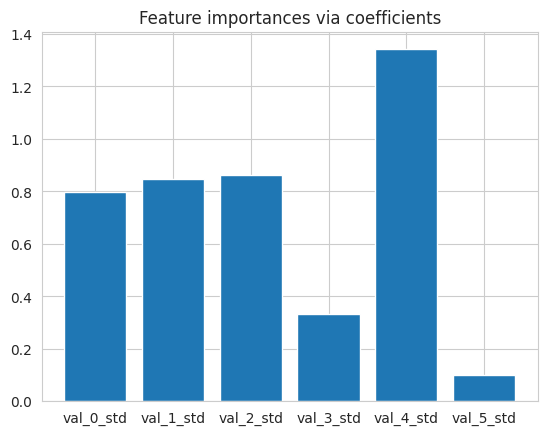

In [48]:
importance = np.abs(ridgecv.coef_)
feature_names = data.columns
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

In [49]:
threshold = np.sort(importance)[1] + 0.15
selector = SelectFromModel(ridgecv, threshold=threshold).fit(X, y)

In [50]:
X_new = pd.DataFrame(data=selector.transform(X), columns=feature_names[selector.get_support()])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42, shuffle=True)

### Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lm = LinearRegression()

In [54]:
lm.fit(X_train, y_train)

LinearRegression()

In [55]:
pred = lm.predict(X_test)

In [56]:
from sklearn.metrics import mean_absolute_error

In [57]:
print(f"MAE: {mean_absolute_error(y_test, pred)}")

MAE: 0.875476393446074


### Ridge Regression

In [58]:
from sklearn.linear_model import Ridge

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
ridge = Ridge()

In [61]:
parameters = {
    'alpha' : (0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100),
    'solver': ('svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'),
}

In [62]:
grid_search = GridSearchCV(estimator=ridge,
                           param_grid=parameters,
                           n_jobs=-1,
                           cv=5,
                           scoring='neg_mean_absolute_error',
                           error_score='raise')

In [63]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': (1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50,
                                   100),
                         'solver': ('svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga')},
             scoring='neg_mean_absolute_error')

In [64]:
print(grid_search.best_params_)
ridge_best = grid_search.best_estimator_

{'alpha': 0.01, 'solver': 'saga'}


In [65]:
pred = ridge_best.predict(X_test)

In [66]:
print(f"MAE: {mean_absolute_error(y_test, pred)}")

MAE: 0.8754834137445308


### Lasso Regression

In [67]:
from sklearn.linear_model import Lasso

In [68]:
lasso = Lasso(max_iter=3000)

In [69]:
parameters = {
    'alpha' : (0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100),
    'selection': ('cyclic', 'random'),
}

In [70]:
grid_search = GridSearchCV(estimator=lasso,
                           param_grid=parameters,
                           n_jobs=-1,
                           cv=5,
                           scoring='neg_mean_absolute_error',
                           error_score='raise')

In [71]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=Lasso(max_iter=3000),
             n_jobs=-1,
             param_grid={'alpha': (1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                   10, 50, 100),
                         'selection': ('cyclic', 'random')},
             scoring='neg_mean_absolute_error')

In [72]:
print(grid_search.best_params_)
lasso_best = grid_search.best_estimator_

{'alpha': 1e-06, 'selection': 'random'}


In [73]:
pred = lasso_best.predict(X_test)

In [74]:
print(f"MAE: {mean_absolute_error(y_test, pred)}")

MAE: 0.8754775023970099


### ElasticNet Boosting Regression

In [75]:
from sklearn.linear_model import ElasticNet

In [76]:
elne = ElasticNet(max_iter=1000)

In [77]:
parameters = {
    'alpha' : (0.0001, 0.001, 0.01, 0.1, 1, 10, 100),
    'l1_ratio': (0.0, 0.1, 1.0),
}

In [78]:
grid_search = GridSearchCV(estimator=elne,
                           param_grid=parameters,
                           n_jobs=-1,
                           cv=5,
                           scoring='neg_mean_absolute_error',
                           error_score='raise')

In [79]:
grid_search.fit(X_train, y_train)

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.360e+02, tolerance: 1.012e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.436e+02, tolerance: 1.043e-01 Linear regression models with null wei

GridSearchCV(cv=5, error_score='raise', estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': (0.0001, 0.001, 0.01, 0.1, 1, 10, 100),
                         'l1_ratio': (0.0, 0.1, 1.0)},
             scoring='neg_mean_absolute_error')

In [80]:
print(grid_search.best_params_)
elne_best = grid_search.best_estimator_

{'alpha': 0.0001, 'l1_ratio': 0.0}


In [81]:
pred = elne_best.predict(X_test)

In [82]:
print(f"MAE: {mean_absolute_error(y_test, pred)}")

MAE: 0.8755950034843109


### Gradient Boosting Regression

In [83]:
from sklearn.ensemble import GradientBoostingRegressor

In [84]:
gbr = GradientBoostingRegressor()

In [85]:
parameters = {
    'max_depth': (10, 100, 1000),
    'alpha' : (0.001, 0.01, 0.1, 0.5),
    'max_features': (2, 3, 4),
    'min_samples_leaf': (2, 3, 4),
    'min_samples_split': (5, 10, 15),
    'n_estimators': (100, 200, 500, 1000),
}

In [86]:
grid_search = GridSearchCV(estimator=gbr,
                           param_grid=parameters,
                           n_jobs=-1,
                           cv=5,
                           scoring='neg_mean_absolute_error',
                           error_score='raise')

In [87]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=GradientBoostingRegressor(),
             n_jobs=-1,
             param_grid={'alpha': (0.001, 0.01, 0.1, 0.5),
                         'max_depth': (10, 100, 1000),
                         'max_features': (2, 3, 4),
                         'min_samples_leaf': (2, 3, 4),
                         'min_samples_split': (5, 10, 15),
                         'n_estimators': (100, 200, 500, 1000)},
             scoring='neg_mean_absolute_error')

In [88]:
print(grid_search.best_params_)
gbr_best = grid_search.best_estimator_

{'alpha': 0.1, 'max_depth': 1000, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [89]:
pred = gbr_best.predict(X_test)

In [90]:
print(f"MAE: {mean_absolute_error(y_test, pred)}")

MAE: 0.515036622544563


### Stochastic Gradient Descent Regression

In [91]:
from sklearn.linear_model import SGDRegressor

In [92]:
sgd = SGDRegressor()

In [93]:
parameters = {
    'alpha': (0.5, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001), 
    'loss': ('huber', 'epsilon_insensitive'),
    'penalty': ('l2', 'l1', 'elasticnet'),
    'l1_ratio': (0.1, 0.5, 0.8),
    'learning_rate': ('constant', 'optimal', 'invscaling', 'adaptive'),
}

In [94]:
grid_search = GridSearchCV(estimator=sgd,
                           param_grid=parameters,
                           n_jobs=-1,
                           cv=5,
                           scoring='neg_mean_absolute_error',
                           error_score='raise')

In [95]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'alpha': (0.5, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06),
                         'l1_ratio': (0.1, 0.5, 0.8),
                         'learning_rate': ('constant', 'optimal', 'invscaling',
                                           'adaptive'),
                         'loss': ('huber', 'epsilon_insensitive'),
                         'penalty': ('l2', 'l1', 'elasticnet')},
             scoring='neg_mean_absolute_error')

In [96]:
print(grid_search.best_params_)
sgd_best = grid_search.best_estimator_

{'alpha': 1e-06, 'l1_ratio': 0.1, 'learning_rate': 'constant', 'loss': 'epsilon_insensitive', 'penalty': 'l1'}


In [97]:
pred = sgd_best.predict(X_test)

In [98]:
print(f"MAE: {mean_absolute_error(y_test, pred)}")

MAE: 0.8252191980005843


### Bayesian Ridge Regression

In [99]:
from sklearn.linear_model import BayesianRidge

In [100]:
bard = BayesianRidge()

In [101]:
parameters = {
    'alpha_init': (0.1, 0.5, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.9),
    'lambda_init': (1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-9)
}

In [102]:
grid_search = GridSearchCV(estimator=bard,
                           param_grid=parameters,
                           n_jobs=-1,
                           cv=5,
                           scoring='neg_mean_absolute_error',
                           error_score='raise')

In [103]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=BayesianRidge(), n_jobs=-1,
             param_grid={'alpha_init': (0.1, 0.5, 1, 1.1, 1.2, 1.3, 1.4, 1.5,
                                        1.9),
                         'lambda_init': (0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                         1e-09)},
             scoring='neg_mean_absolute_error')

In [104]:
print(grid_search.best_params_)
bard_best = grid_search.best_estimator_

{'alpha_init': 0.1, 'lambda_init': 1e-09}


In [105]:
pred = bard_best.predict(X_test)

In [106]:
print(f"MAE: {mean_absolute_error(y_test, pred)}")

MAE: 0.8776213824940046


### Decision Tree Regressor

In [107]:
from sklearn.tree import DecisionTreeRegressor

In [108]:
dtree = DecisionTreeRegressor()

In [109]:
parameters = {
    'criterion': ('squared_error', 'friedman_mse', 'absolute_error', 'poisson'),
    'splitter': ('best', 'random'),
    'max_depth': (10, 100, 1000, 5000, 10000),
    'max_features': (2, 3, 4, 5),
    'min_samples_leaf': (1, 2, 3, 4, 5),
    'min_samples_split': (5, 10, 15),
}

In [110]:
grid_search = GridSearchCV(estimator=dtree,
                           param_grid=parameters,
                           n_jobs=-1,
                           cv=5,
                           scoring='neg_mean_absolute_error',
                           error_score='raise')

In [111]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=DecisionTreeRegressor(),
             n_jobs=-1,
             param_grid={'criterion': ('squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'),
                         'max_depth': (10, 100, 1000, 5000, 10000),
                         'max_features': (2, 3, 4, 5),
                         'min_samples_leaf': (1, 2, 3, 4, 5),
                         'min_samples_split': (5, 10, 15),
                         'splitter': ('best', 'random')},
             scoring='neg_mean_absolute_error')

In [112]:
print(grid_search.best_params_)
dtree_best = grid_search.best_estimator_

{'criterion': 'absolute_error', 'max_depth': 1000, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}


In [113]:
pred = dtree_best.predict(X_test)

In [114]:
print(f"MAE: {mean_absolute_error(y_test, pred)}")

MAE: 0.5562624584717608


### k-Nearest Neighbors Regressor

In [115]:
from sklearn.neighbors import KNeighborsRegressor

In [116]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

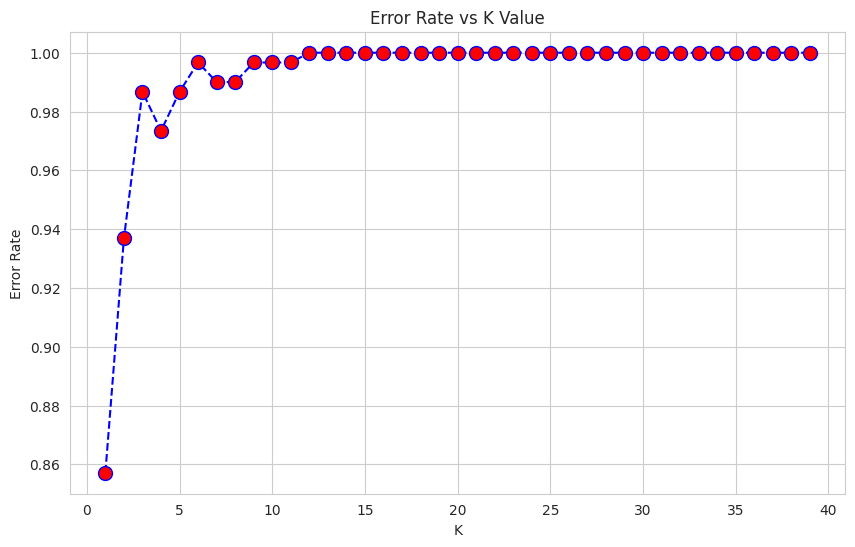

In [117]:
plt.figure(figsize=(10,6))
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

In [118]:
knn = KNeighborsRegressor(n_neighbors=1)

In [119]:
parameters = {
    'weights': ('uniform', 'distance'),
    'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
    'leaf_size': (1, 5, 10, 20, 30, 50),
    'p': (1, 2, 3),
    'metric': ('minkowski', 'chebyshev'),
}

In [120]:
grid_search = GridSearchCV(estimator=knn,
                           param_grid=parameters,
                           n_jobs=-1,
                           cv=5,
                           scoring='neg_mean_absolute_error',
                           error_score='raise')

In [121]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=KNeighborsRegressor(n_neighbors=1), n_jobs=-1,
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'leaf_size': (1, 5, 10, 20, 30, 50),
                         'metric': ('minkowski', 'chebyshev'), 'p': (1, 2, 3),
                         'weights': ('uniform', 'distance')},
             scoring='neg_mean_absolute_error')

In [122]:
print(grid_search.best_params_)
knn_best = grid_search.best_estimator_

{'algorithm': 'brute', 'leaf_size': 1, 'metric': 'minkowski', 'p': 2, 'weights': 'distance'}


In [123]:
pred = knn_best.predict(X_test)

In [124]:
print(f"MAE: {mean_absolute_error(y_test, pred)}")

MAE: 0.5470431893687707


### SVR

In [125]:
from sklearn.svm import SVR

In [126]:
svr = SVR()

In [127]:
parameters = {
    'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
    'gamma': (0.001, 0.01, 0.1, 1, 10),
    'C': (0.001, 0.01, 0.1, 1, 10),
}

In [128]:
grid_search = GridSearchCV(estimator=svr,
                           param_grid=parameters,
                           n_jobs=-1,
                           cv=5,
                           scoring='neg_mean_absolute_error',
                           error_score='raise')

In [129]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=SVR(), n_jobs=-1,
             param_grid={'C': (0.001, 0.01, 0.1, 1, 10),
                         'gamma': (0.001, 0.01, 0.1, 1, 10),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             scoring='neg_mean_absolute_error')

In [130]:
print(grid_search.best_params_)
svr_best = grid_search.best_estimator_

{'C': 1, 'gamma': 10, 'kernel': 'rbf'}


In [131]:
pred = svr_best.predict(X_test)

In [132]:
print(f"MAE: {mean_absolute_error(y_test, pred)}")

MAE: 0.4923703664735227


### Multi-layer Perceptron Regressor

In [133]:
from sklearn.neural_network import MLPRegressor

In [134]:
mlp = MLPRegressor(max_iter=2000)

In [135]:
parameters = {
    "activation" : ("identity", "logistic", "tanh", "relu"),
    "solver" : ("lbfgs", "sgd", "adam"),
    "alpha": (0.001, 0.01, 0.1),
    "hidden_layer_sizes" : ((50,100,50), (100,))
}

In [136]:
grid_search = GridSearchCV(estimator=mlp,
                           param_grid=parameters,
                           n_jobs=-1,
                           cv=5,
                           scoring='neg_mean_absolute_error',
                           error_score='raise')

In [137]:
grid_search.fit(X_train, y_train)

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course

GridSearchCV(cv=5, error_score='raise', estimator=MLPRegressor(max_iter=2000),
             n_jobs=-1,
             param_grid={'activation': ('identity', 'logistic', 'tanh', 'relu'),
                         'alpha': (0.001, 0.01, 0.1),
                         'hidden_layer_sizes': ((50, 100, 50), (100,)),
                         'solver': ('lbfgs', 'sgd', 'adam')},
             scoring='neg_mean_absolute_error')

In [138]:
print(grid_search.best_params_)
mlp_best = grid_search.best_estimator_

{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}


In [139]:
pred = mlp_best.predict(X_test)

In [140]:
print(f"MAE: {mean_absolute_error(y_test, pred)}")

MAE: 0.5854727068989074


## Evaluating choosen model on a test data

### best model

In [141]:
best_model = svr_best

### raw data

In [142]:
test_df_raw = pd.read_excel("Test_raw.xlsx")

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [143]:
test_df_raw.head()

,second,val_0,val_1,val_2,val_3,val_4,val_5
0,0,35,33,88,138,31,27
1,0,35,29,85,142,33,24
2,0,36,43,89,136,32,22
3,0,37,45,85,136,32,25
4,0,35,41,88,88,38,27


In [144]:
test_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248012 entries, 0 to 248011
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   second  248012 non-null  int64
 1   val_0   248012 non-null  int64
 2   val_1   248012 non-null  int64
 3   val_2   248012 non-null  int64
 4   val_3   248012 non-null  int64
 5   val_4   248012 non-null  int64
 6   val_5   248012 non-null  int64
dtypes: int64(7)
memory usage: 13.2 MB


### preprocessed data

In [145]:
test_df_prep = pd.read_excel("Test_preprocessed.xlsx")

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [146]:
test_df_prep.head()

,second,val_0_min,val_1_min,val_2_min,val_3_min,val_4_min,val_5_min,val_0_max,val_1_max,val_2_max,...,val_2_std,val_3_std,val_4_std,val_5_std,val_0_var,val_1_var,val_2_var,val_3_var,val_4_var,val_5_var
0,0,14,17,16,14,13,11,39,57,99,...,16.823652,31.716844,6.735265,3.493457,17.822167,33.775603,283.035277,1005.958219,45.363789,12.204244
1,1,6,8,12,10,7,5,37,49,96,...,18.482581,33.848272,8.878503,5.493130,28.887110,70.294392,341.605782,1145.705512,78.827813,30.174478
2,2,6,7,7,6,6,5,36,49,90,...,24.210578,38.462332,4.992304,8.337549,53.930769,51.673880,586.152110,1479.350948,24.923102,69.514726
3,3,6,6,6,5,5,5,36,37,87,...,15.784262,22.402361,3.511924,5.434497,29.958586,19.278194,249.142933,501.865769,12.333614,29.533761
4,4,6,8,11,8,7,5,34,47,96,...,20.899157,39.094312,8.958503,5.071132,25.636980,74.628700,436.774766,1528.365196,80.254780,25.716381


In [147]:
test_df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   second      420 non-null    int64  
 1   val_0_min   420 non-null    int64  
 2   val_1_min   420 non-null    int64  
 3   val_2_min   420 non-null    int64  
 4   val_3_min   420 non-null    int64  
 5   val_4_min   420 non-null    int64  
 6   val_5_min   420 non-null    int64  
 7   val_0_max   420 non-null    int64  
 8   val_1_max   420 non-null    int64  
 9   val_2_max   420 non-null    int64  
 10  val_3_max   420 non-null    int64  
 11  val_4_max   420 non-null    int64  
 12  val_5_max   420 non-null    int64  
 13  val_0_mean  420 non-null    float64
 14  val_1_mean  420 non-null    float64
 15  val_2_mean  420 non-null    float64
 16  val_3_mean  420 non-null    float64
 17  val_4_mean  420 non-null    float64
 18  val_5_mean  420 non-null    float64
 19  val_0_med   420 non-null    f

In [148]:
prep_value = X.columns[0].split('_')[-1]
sec = test_df_prep['second']
test_df_prep = test_df_prep[[f"val_0_{prep_value}", f"val_1_{prep_value}",
                             f"val_2_{prep_value}", f"val_3_{prep_value}",
                             f"val_4_{prep_value}", f"val_5_{prep_value}"]]

In [149]:
scaler.fit(test_df_prep)
scaled_test_feat = scaler.fit_transform(test_df_prep)

NameError: name 'scaler' is not defined

In [ ]:
scaled_test_set = pd.DataFrame(scaled_test_feat, columns=test_df_prep.columns)
scaled_test_set.head()

In [ ]:
scaled_test_set_new = pd.DataFrame(data=selector.transform(scaled_test_set), columns=feature_names[selector.get_support()])

In [ ]:
test_pred = best_model.predict(scaled_test_set)

In [ ]:
final_pred = pd.DataFrame(data={'second': sec,
                                'RQ': pd.Series(test_pred)})
final_pred.to_csv("mini_contest_2_results.csv", index=False)